## EMOTION DETECTION/SENTIMENT ANALYSIS IN TEXT

This project classifies Emotions in text using Machine Learning

In [1]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df = pd.read_csv("tweet_emotions.csv")
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
# dimension of the data
df.shape

(40000, 3)

In [4]:
# checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [5]:
# checking for the missing values
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


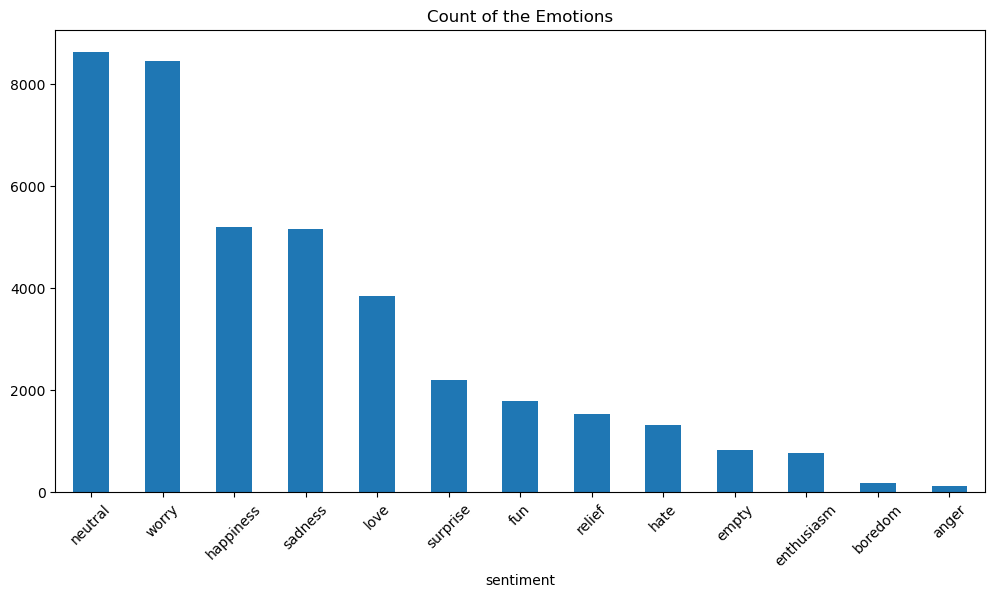

In [6]:
plt.figure(figsize = (12,6))
print(df["sentiment"].value_counts())
df["sentiment"].value_counts().plot(kind="bar")
plt.xticks(rotation = 45)
plt.title("Count of the Emotions")
plt.show()

#### Sentiment Analysis

In [7]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [8]:
get_sentiment("I love coding")

'Positive'

In [9]:
df["Sentiment_predicted"] = df["content"].apply(get_sentiment)

In [10]:
df.head(10)

,tweet_id,sentiment,content,Sentiment_predicted
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,Neutral
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",Positive
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,Negative
8,1956969035,sadness,@charviray Charlene my love. I miss you,Positive
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,Negative


In [11]:
# comparing sentiment and sentiment predicted
df.groupby(["sentiment","Sentiment_predicted"]).size()

sentiment   Sentiment_predicted
anger       Negative                 34
            Neutral                  41
            Positive                 35
boredom     Negative                 80
            Neutral                  56
            Positive                 43
empty       Negative                168
            Neutral                 418
            Positive                241
enthusiasm  Negative                100
            Neutral                 254
            Positive                405
fun         Negative                205
            Neutral                 474
            Positive               1097
happiness   Negative                345
            Neutral                1224
            Positive               3640
hate        Negative                694
            Neutral                 364
            Positive                265
love        Negative                214
            Neutral                 684
            Positive               2944
neutral 

<Figure size 1500x600 with 0 Axes>

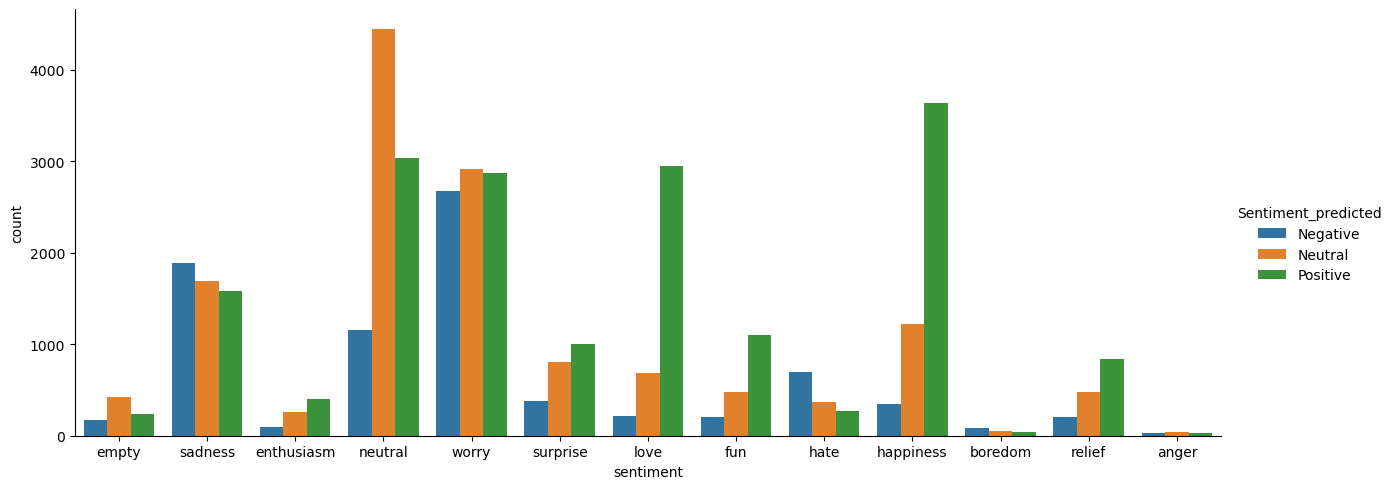

In [12]:
plt.figure(figsize=(15,6))
sns.catplot(data = df, x = "sentiment", hue = "Sentiment_predicted",kind = "count",aspect = 2.5)
plt.show()

#### Text Cleaning

In [13]:
# Removing stopwords
df["clean_text"] = df["content"].apply(nfx.remove_stopwords)
# Removing user handles
df["clean_text"] = df["clean_text"].apply(nfx.remove_userhandles)
#Removing punctuations
df["clean_text"] = df["clean_text"].apply(nfx.remove_punctuations)
# Removing speccial character
df["clean_text"] = df["clean_text"].apply(nfx.remove_special_characters)

In [14]:
df[["content","clean_text"]]

,content,clean_text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


#### Keyword Extraction

In [15]:
# creating a function that extract only the 50 most common words in a text
def extract_keyword(text, num = 50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(50)
    return dict(most_common_tokens)

Analysing the love sentiment

In [16]:
love_list = df[df["sentiment"] == "love"]["clean_text"].tolist()
love_doc = " ".join(love_list)
love_keyword = extract_keyword(love_doc)

In [17]:
def plot_most_common_word(mydict,emotion):
    new_df = pd.DataFrame(mydict.items(), columns = ["token","count"])
    plt.figure(figsize = (15,6))
    sns.barplot(data = new_df, x = "token", y = "count")
    plt.title(f"Count of {emotion} sentiment")
    plt.xticks(rotation = 45)
    plt.show()

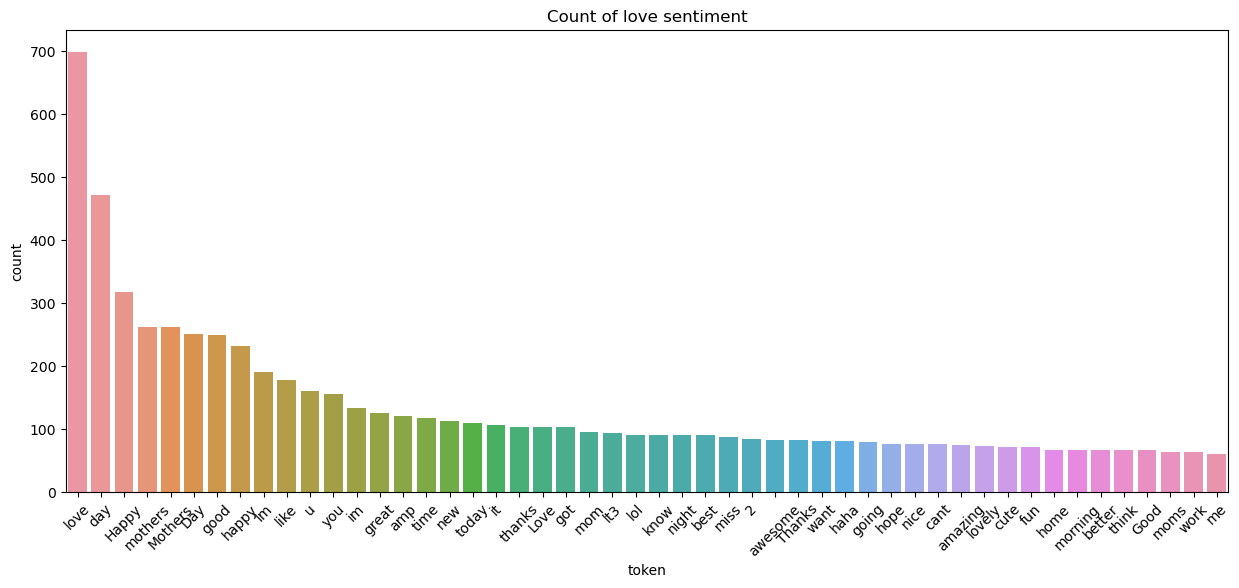

In [18]:
plot_most_common_word(love_keyword,"love")

In [19]:
def plot_word_cloud(docx,emotion):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize = (15,6))
    plt.imshow(mywordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(f"wordcloud for {emotion} sentiment")
    plt.show()

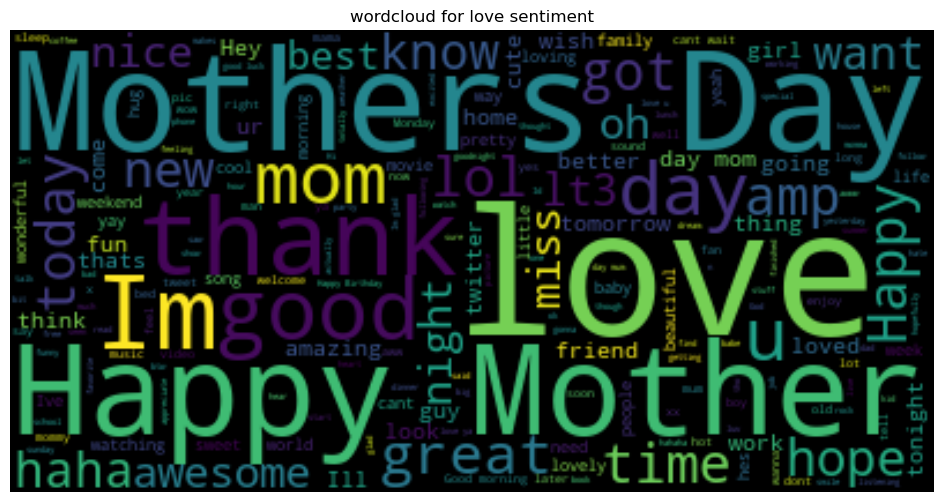

In [20]:
plot_word_cloud(love_doc,"love")

Analysing the hate sentiment

In [21]:
hate_list = df[df["sentiment"] == "hate"]["clean_text"].tolist()
hate_doc = " ".join(hate_list)
hate_keyword = extract_keyword(hate_doc)

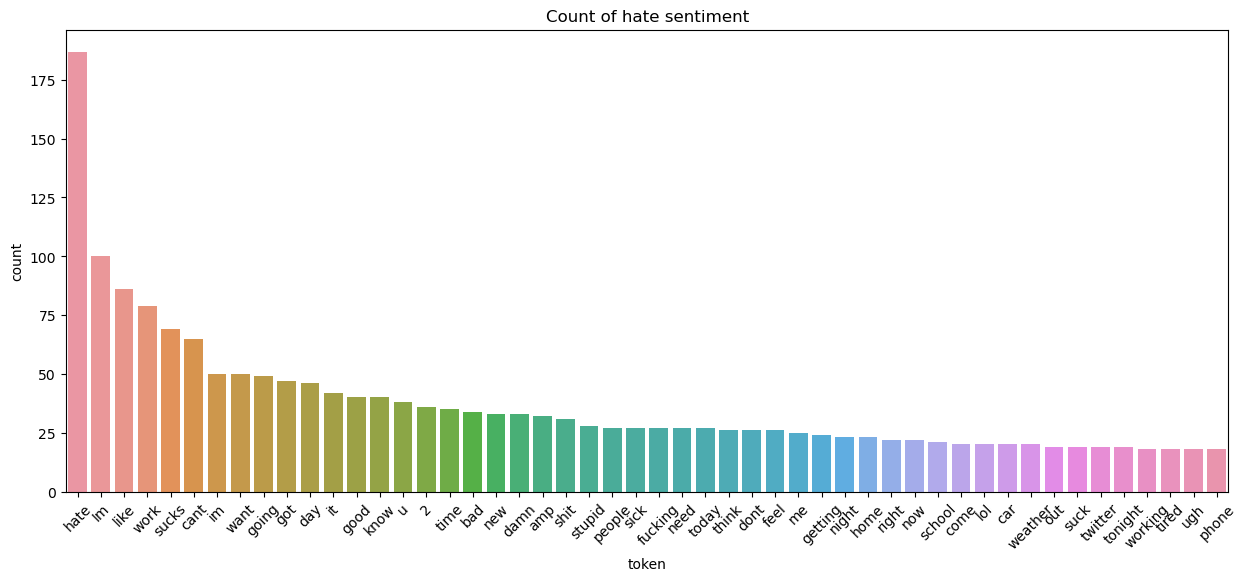

In [22]:
plot_most_common_word(hate_keyword,"hate")

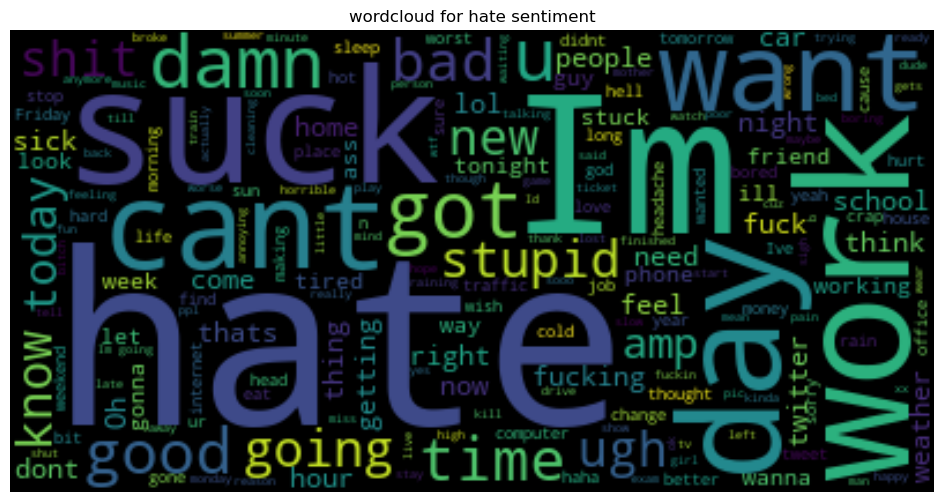

In [23]:
plot_word_cloud(hate_doc,"hate")

In [76]:
# Loading Machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# for splitting the dataset
from sklearn.model_selection import train_test_split

In [33]:
## Building features from the text
x_features = df["clean_text"]
ylabels = df["sentiment"]

In [34]:
# vectorizing
cv = CountVectorizer()
X = cv.fit_transform(x_features)

In [37]:
# splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels, test_size = 0.2, random_state = 42)

In [38]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [39]:
nv_model.score(X_test, y_test)

0.31275

In [40]:
nb_y_pred = nv_model.predict(X_test)

In [64]:
# make a single prediction
def predict_emotion(sample_text, model):
    vect = cv.transform(sample_text).toarray()
    prediction = model.predict(vect)
    pred_proba = model.predict_proba(vect)
    pred_pecentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction: {}, Prediction Score:{}".format(prediction[0], np.max(pred_proba)))

In [65]:
text = ["I love coding so much"]
predict_emotion(text, nv_model)

Prediction: love, Prediction Score:0.3269698833207598


In [71]:
### Model Evaluation
print(classification_report(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.31      0.33      0.32      1028
        hate       0.43      0.02      0.04       268
        love       0.46      0.32      0.38       762
     neutral       0.34      0.39      0.36      1740
      relief       0.00      0.00      0.00       352
     sadness       0.29      0.15      0.20      1046
    surprise       0.16      0.01      0.02       425
       worry       0.28      0.64      0.39      1666

    accuracy                           0.31      8000
   macro avg       0.18      0.14      0.13      8000
weighted avg       0.28      0.31      0.27      8000

[[   0    0    0    0    0    2    0    0    4    0    3    0   10]
 [   0    0

In [77]:
# Save model
import joblib

In [78]:
model_file = open("nb_emotion_classifier.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [79]:
# using logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [80]:
lr_model.score(X_test,y_test)

0.33525

In [81]:
text = ["I love coding so much"]
predict_emotion(text, lr_model)

Prediction: love, Prediction Score:0.4029163218898902


In [83]:
## Interpreting Model
import eli5

In [85]:
eli5.show_weights(lr_model, top = 20)

In [91]:
class_names = ylabels.unique().tolist()
feature_names = cv.get_feature_names_out()

In [92]:
eli5.show_weights(lr_model, feature_names = feature_names, target_names = class_names)